# FAKE NEWS DETECTION USING MACHINE LEARNING

## importing packages

In [217]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
## corpus means the body of the text / important content of the text
from nltk.stem.porter import PorterStemmer
## stem takes the word removes prefix and suffix of the word and returns root word
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [168]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Sujit Kumar
[nltk_data]     Bose\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [169]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Data Preprocessing

#### title stands for news article heading
#### author stands for sauthor of the news article
#### text stands for the news, may be incomplete
#### label marks if news is real or fake

#### 1: Fake News
#### 0: Real News

In [170]:
news_dataset=pd.read_csv("train.csv")
news_dataset.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [171]:
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [172]:
new_dataset= news_dataset.fillna('')

In [173]:
#merge author name and news title 

news_dataset['content'] = news_dataset['author'] + news_dataset['title']
news_dataset['content']

0        Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1        Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...
2        Consortiumnews.comWhy the Truth Might Get You ...
3        Jessica Purkiss15 Civilians Killed In Single U...
4        Howard PortnoyIranian woman jailed for fiction...
                               ...                        
20795    Jerome HudsonRapper T.I.: Trump a ’Poster Chil...
20796    Benjamin HoffmanN.F.L. Playoffs: Schedule, Mat...
20797    Michael J. de la Merced and Rachel AbramsMacy’...
20798    Alex AnsaryNATO, Russia To Hold Parallel Exerc...
20799               David SwansonWhat Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

In [174]:
X= news_dataset.drop(columns ='label', axis=1)
Y= news_dataset['label']
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [175]:
# Stemming
# process of reducing a word to it's root word

port_stem = PorterStemmer()

In [176]:
def stemming(content):
    stemmed_content = re.sub(r'[^a-zA-Z]',' ',str(content))
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [177]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [178]:
print(news_dataset["content"])

0        darrel lucushous dem aid even see comey letter...
1        daniel j flynnflynn hillari clinton big woman ...
2                consortiumnew comwhi truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoyiranian woman jail fiction unpub...
                               ...                        
20795    jerom hudsonrapp trump poster child white supr...
20796    benjamin hoffmann f l playoff schedul matchup ...
20797    michael j de la merc rachel abramsmaci said re...
20798    alex ansarynato russia hold parallel exercis b...
20799                        david swansonwhat keep f aliv
Name: content, Length: 20800, dtype: object


In [179]:
#seperating the data and label
X= news_dataset['content'].values
Y= news_dataset['label'].values
print(X)

['darrel lucushous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynnflynn hillari clinton big woman campu breitbart'
 'consortiumnew comwhi truth might get fire' ...
 'michael j de la merc rachel abramsmaci said receiv takeov approach hudson bay new york time'
 'alex ansarynato russia hold parallel exercis balkan'
 'david swansonwhat keep f aliv']


In [180]:
print(Y)

[1 0 1 ... 0 1 1]


In [181]:
#converting textual data to numerical data

vectorizer = TfidfVectorizer() #counting number of times a particular words occur
vectorizer.fit(X)

X = vectorizer.transform(X)
print(X)

  (0, 25227)	0.28162432751900723
  (0, 21770)	0.25518388134317993
  (0, 14389)	0.42550017924124683
  (0, 13944)	0.2935671022600897
  (0, 12255)	0.24490363037653382
  (0, 7670)	0.2294324647741814
  (0, 6013)	0.28294233649002914
  (0, 5717)	0.3547296154644373
  (0, 4795)	0.2482488322255666
  (0, 4032)	0.36794983855235097
  (0, 557)	0.2698440335941719
  (1, 26730)	0.3744312207519615
  (1, 10851)	0.24826005870998635
  (1, 8388)	0.5207038261529267
  (1, 5665)	0.3164600305921311
  (1, 4564)	0.23917941579214552
  (1, 3695)	0.45529309555390174
  (1, 3144)	0.18469422901356766
  (1, 2511)	0.358159496054757
  (2, 25131)	0.3695625476390389
  (2, 15680)	0.4334631658640028
  (2, 9042)	0.31082464039565
  (2, 8189)	0.3428370903265172
  (2, 5023)	0.4018370365446361
  (2, 4909)	0.5476412837817158
  :	:
  (20797, 24698)	0.08187923460575433
  (20797, 24266)	0.30911861302070653
  (20797, 21156)	0.25407450176760565
  (20797, 19904)	0.2752263028427713
  (20797, 19632)	0.24870270907041134
  (20797, 16767)	0.0

In [182]:
# 80-20 data division
# X is content column and Y is the label
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

##  Logistic Regression

##### We use the sigmoid function Y=1/(1+e^Z) where Z = w*X + b
##### X is the input features
##### Y is the Prediction Probability
##### w is the weight
##### b is the bias
##### If the threshold value is more towards 1 , then the model predicts it is fake news
##### If it is less and more towards the 0, then it is real news

In [183]:
model = LogisticRegression()

In [184]:
model.fit(X_train, Y_train)

LogisticRegression()

In [243]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [244]:
print("Accuracy score of training data: ", training_data_accuracy)

Accuracy score of training data:  0.9796274038461539


In [245]:
accuracy = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracy.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy.std()*100))

Accuracy: 95.91 %
Standard Deviation: 0.56 %


In [187]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [188]:
print("Accuracy score of test data: ", test_data_accuracy)

Accuracy score of test data:  0.9617788461538461


In [247]:
accuracy_lg = cross_val_score(estimator = model, X = X_test, y = Y_test, cv = 10)
print("Accuracy: {:.2f} %".format(accuracy_lg.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy_lg.std()*100))

Accuracy: 93.80 %
Standard Deviation: 1.23 %


In [189]:
print(confusion_matrix(Y_test,X_test_prediction))

[[1943  134]
 [  25 2058]]


In [190]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2077
           1       0.94      0.99      0.96      2083

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160



## Decision Tree

In [234]:
classifier = DecisionTreeClassifier(criterion = 'gini')
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [235]:
classifier.score(X_test, Y_test)

0.9762019230769231

In [237]:
X_test_predict = classifier.predict(X_test)
test_accuracy = accuracy_score(X_test_predict, Y_test)
test_accuracy

0.9762019230769231

In [238]:
accuracy_DT = cross_val_score(estimator = classifier, X = X_test, y = Y_test, cv = 10)
print("Accuracy: {:.2f} %".format(accuracy_DT .mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy_DT.std()*100))

Accuracy: 95.77 %
Standard Deviation: 0.75 %


In [193]:
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [239]:
classifier.score(X_test, Y_test)

0.9762019230769231

In [241]:
X_test_predict1 = classifier.predict(X_test)
test_accuracy1 = accuracy_score(X_test_predict1, Y_test)
test_accuracy1

0.9762019230769231

In [242]:
accuracy_DT1 = cross_val_score(estimator = classifier, X = X_test, y = Y_test, cv = 10)
print("Accuracy: {:.2f} %".format(accuracy_DT1 .mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy_DT1.std()*100))

Accuracy: 95.94 %
Standard Deviation: 1.13 %


## SVM

In [196]:
model1 = SVC(kernel = 'linear', random_state = 0)

In [197]:
model1.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [199]:
accuracies = cross_val_score(estimator = model1, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.82 %
Standard Deviation: 0.25 %


In [214]:
accuracies_test = cross_val_score(estimator = model1, X = X_test, y = Y_test, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_test.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_test.std()*100))

Accuracy: 95.55 %
Standard Deviation: 1.25 %


In [205]:
X_train_prediction1 = model.predict(X_train)
print(confusion_matrix(Y_test,X_test_prediction1))

[[2025   52]
 [  40 2043]]


In [206]:
print(classification_report(Y_test, X_test_prediction1))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2077
           1       0.98      0.98      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



### Prediction System

In [202]:
X_new = X_test[0]

prediction = model.predict(X_new)
print(prediction)

if(prediction[0]==0):
    print("The news is Real")
else:
    print("The news is Fake")

print(Y_test[0])

[1]
The news is Fake
1


## Compare the ML Models and their accuracy for Test Data

In [248]:
accur=[accuracy_lg,accuracy_DT,accuracy_DT1,accuracies_test]
names=["Logistic Regression","Decision Tree Gini","Decision Tree Entropy","SVM"]

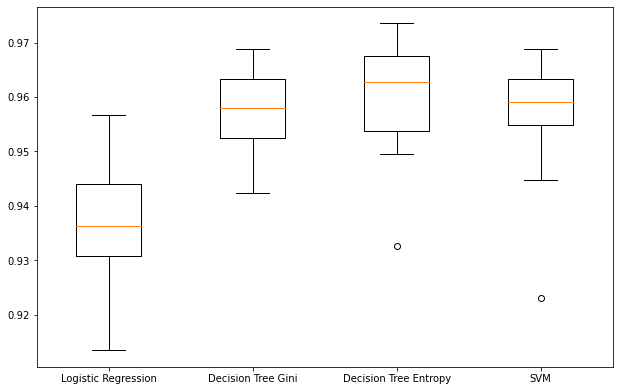

In [253]:
fig = plt.figure(figsize =(8, 5)) 
 
# Making an axis instance
ax = fig.add_axes([0, 0, 1, 1]) 
 
# Making a plot 
bp = ax.boxplot(accur) 
ax.set_xticklabels(names) 
# display the plot 
plt.show() 